<h1 class="title">Example-Dependent Cost-Sensitive Credit Scoring using CostCla</h1>

<center>

<h2>Alejandro Correa Bahnsen</h2>

<a href="http://www.albahnsen.com" target="_blank">albahnsen.com</a>

<div>
<img img class="logo" src="https://raw.githubusercontent.com/albahnsen/CostSensitiveClassification/master/doc/tutorial/files/logo_unilu_snt.jpg" style="width: 200px;">
</div>

<div>
<img img class="logo" src="https://raw.githubusercontent.com/albahnsen/CostSensitiveClassification/master/logo.png" style="width: 300px;">
</div>

<h3>PyData Berlin, May 2015</h3>
</center>

TODO
You find the presentation and the IPython Notebook here:
    
* <a href="http://www.hilpisch.com/YH_FPQ_Volatility_Tutorial.html" target="_blank">http://www.hilpisch.com/YH_FPQ_Volatility_Tutorial.html</a>
* <a href="http://www.hilpisch.com/YH_FPQ_Volatility_Tutorial.ipynb" target="_blank">http://www.hilpisch.com/YH_FPQ_Volatility_Tutorial.ipynb</a>

<h1 class="bigtitle">About Me</h1>

TODO A brief bio:

* Managing Director Europe of Continuum Analytics Inc.
* Founder of Visixion GmbH – The Python Quants
* Lecturer Mathematical Finance at Saarland University
* Focus on Financial Industry and Financial Analytics
* Book "**Derivatives Analytics with Python**" (2013)
* Book "**Python for Finance**" O'Reilly (2014)
* Dr.rer.pol in Mathematical Finance
* Graduate in Business Administration
* Martial Arts Practitioner and Fan

See <a href="http://www.hilpisch.com" target="_blank">www.hilpisch.com</a>.

<h1 class="bigtitle">Credit Scoring</h1>

#Example

| <img src="https://raw.githubusercontent.com/albahnsen/CostSensitiveClassification/master/doc/tutorial/files/s_scoring_Picture1.png" style="width: 300px;"> | <img src="https://raw.githubusercontent.com/albahnsen/CostSensitiveClassification/master/doc/tutorial/files/s_scoring_Picture2.png" style="width: 300px;">  |
|:-:|:-:|
| Just fund a bank  | Just quit college  |



# Example

| <img src="https://raw.githubusercontent.com/albahnsen/CostSensitiveClassification/master/doc/tutorial/files/s_scoring_Picture3.png" style="width: 300px;"> | <img src="https://raw.githubusercontent.com/albahnsen/CostSensitiveClassification/master/doc/tutorial/files/s_scoring_Picture4.png" style="width: 300px;">  |
|:-:|:-:|
| Biggest Ponzi scheme  | Now a Billionaire  |



# Credit Scoring

- Mitigate the impact of **credit risk** and make more objective
and accurate decisions

- Estimate the **risk of a customer defaulting** his contracted
financial obligation if a loan is granted, based on past
experiences

- Different machine learning methods are used in practice, and in the
literature: logistic regression, neural networks, discriminant
analysis, genetic programing, decision trees, random forests among others

# Credit Scoring

Formally, a credit score is a statistical model that allows the estimation of the probability 

  $$\hat p_i=P(y_i=1|\mathbf{x}_i)$$ 
  
of a customer $i$ defaulting a contracted debt ($y_i=1$). Additionally, 
since the objective of credit scoring is to estimate a classifier $c_i$ to decide whether or not to grant a loan to a customer $i$, a threshold $t$ is defined such that if $\hat p_i < t $, then the loan is 
  granted, i.e., $c_i(t)=0$, and denied otherwise, i.e., $c_i(t)=1$.

<h1 class="bigtitle">Example: Kaggle Credit Competition</h1>

Improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years.


https://www.kaggle.com/c/GiveMeSomeCredit

# Load dataset and show basic statistics

In [1]:
import pandas as pd
import numpy as np

In [2]:
from costcla.datasets import load_creditscoring1
data = load_creditscoring1()

# Elements of the data file
print data.keys()

['target_names', 'cost_mat', 'name', 'DESCR', 'feature_names', 'data', 'target']


### Class Label

In [3]:
pd.Series(data.target).value_counts()

0    105299
1      7616
dtype: int64

### Features

In [4]:
pd.DataFrame(data.feature_names, columns=('Features',))

,Features
0,RevolvingUtilizationOfUnsecuredLines
1,age
2,NumberOfTime30-59DaysPastDueNotWorse
3,DebtRatio
4,MonthlyIncome
5,NumberOfOpenCreditLinesAndLoans
6,NumberOfTimes90DaysLate
7,NumberRealEstateLoansOrLines
8,NumberOfTime60-89DaysPastDueNotWorse
9,NumberOfDependents


# Credit scoring as a standard classification problem

In [5]:
# Split dataset in training and testing
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test, cost_mat_train, cost_mat_test = \
train_test_split(data.data, data.target, data.cost_mat)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

classifiers = {"RF": {"f": RandomForestClassifier()},
               "DT": {"f": DecisionTreeClassifier()},
               "LR": {"f": LogisticRegression()}}

# Fit the classifiers using the training dataset
for model in classifiers.keys():
    classifiers[model]["f"].fit(X_train, y_train)
    classifiers[model]["c"] = classifiers[model]["f"].predict(X_test)
    classifiers[model]["p"] = classifiers[model]["f"].predict_proba(X_test)
    classifiers[model]["p_train"] = classifiers[model]["f"].predict_proba(X_train)

# Models performance

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns
figsize(12, 8)

In [8]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
measures = {"F1Score": f1_score, "Precision": precision_score, 
            "Recall": recall_score, "Accuracy": accuracy_score}
results = pd.DataFrame(columns=measures.keys())

for model in classifiers.keys():
    results.loc[model] = [measures[measure](y_test, classifiers[model]["c"]) for measure in measures.keys()]

def fig1():
    plt.figure()
    l = plt.plot(range(results.shape[0]), results, "-o")
    plt.legend(iter(l), results.columns.tolist(), loc='center left', bbox_to_anchor=(1, 0.5),fontsize=22)
    plt.xlim([-0.25, results.shape[0]-1+.25])
    plt.xticks(range(results.shape[0]), results.index) 
    plt.tick_params(labelsize=22)
    plt.show()

# Models performance

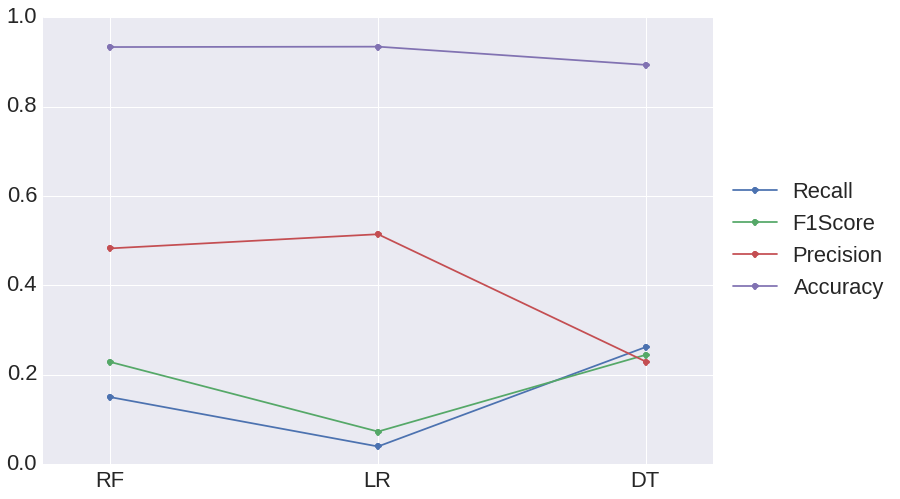

In [9]:
fig1()

Nevertheless, none of these measures takes into account the **business and economical realities** that take place in credit scoring. Costs that the financial institution had incurred to acquire customers, or the **expected profit** due to a particular client, are not considered in the evaluation of the different models. 

<h1 class="bigtitle">Financial Evaluation of a Credit Scorecard</h1>

# Motivation

- Typically, a credit risk model is evaluated using standard cost-insensitive measures.
- However, in practice, the cost associated with approving a bad customer is quite   different from the cost associated with declining a good customer.
- Furthermore, the costs are not constant among customers. 

# Cost Matrix

 
|  	| Actual Positive ($y_i=1$)  	|  Actual Negative 	($y_i=0$)|
|---	|:-:	|:-:	|
|   Predicted Positive ($c_i=1$)	|   $C_{TP_i}=0$	|  $C_{FP_i}=r_i+C^a_{FP}$ 	|
|  Predicted Negative  ($c_i=0$) 	|   $C_{FN_i}=Cl_i \cdot L_{gd}$	| $C_{TN_i}=0$	|

Where:

- $C_{FN_i}$ = losses if the customer $i$ defaults
- $Cl_i$ is the credi line of customer $i$
- $L_{gd}$ is the loss given default. Percentage of loss over the total credit line when the customer defaulted

# Cost Matrix

- $C_{FP_i}=r_i+C^a_{FP}$ 
- $r_i$ is the loss in profit by rejecting what would have been a good customer.
- $C^a_{FP}$ is related to the assumption that the financial institution will not keep the money of the declined customer idle, but instead it will give
a loan to an alternative customer.

For more info see 

A. Correa Bahnsen, D.Aouada, B, Ottersten, “Example-Dependent Cost-Sensitive Logistic Regression for Credit Scoring”, in Proceedings of the International Conference on Machine Learning and Applications, 2014.

# Financial savings

Let $\mathcal{S}$ be a set of $N$ examples $i$, where each example $\mathbf{x}_i$ is labeled as $y_i   \in \{0,1\}$. The financial cost of using a classifier $f$ on $\mathcal{S}$ is calculated by
  
  $$   Cost(f(\mathcal{S})) = \sum_{i=1}^N  y_i(c_i C_{TP_i} + (1-c_i)C_{FN_i}) + (1-y_i)(c_i C_{FP_i} + (1-c_i)C_{TN_i}).$$

Then the financial savings are defined as the cost of the algorithm versus the cost of using no algorithm at all.

  $$    Savings(f(\mathcal{S})) = \frac{ Cost_l(\mathcal{S}) - Cost(f(\mathcal{S}))}   {Cost_l(\mathcal{S})},$$

where $Cost_l(\mathcal{S})$ is the cost of the costless class

# Parameters for the Kaggle Credit Database

Assuming the database belong to  an average European financial institution, we find the different parameters needed to calculate the cost measure

| Parameter 	| Value |
|---	|:-:	|
|Interest rate ($int_r$) | 4.79% |
|  Cost of funds ($int_{cf}$) | 2.94% |
|  Term ($l$) in months | 24 |
|  Loss given default ($L_{gd}$) | 75% |
|  Times income ($q$) | 3 |
|  Maximum credit line ($Cl_{max}$) | 25,000|

In [10]:
# The cost matrix is already calculated for the dataset
# cost_mat[C_FP,C_FN,C_TP,C_TN]
print data.cost_mat[[10, 17, 50]]

[[  1023.73054104  18750.              0.              0.        ]
 [   717.25781516   6749.25            0.              0.        ]
 [   866.65393177  12599.25            0.              0.        ]]


#Models Savings

In [11]:
# Calculation of the cost and savings
from costcla.metrics import savings_score, cost_loss 

# Evaluate the savings for each model
results["Savings"] = np.zeros(results.shape[0])
for model in classifiers.keys():
    results["Savings"].loc[model] = savings_score(y_test, classifiers[model]["c"], cost_mat_test)

# Plot the results
colors = sns.color_palette()

def fig2():
    ax = plt.subplot(111)
    l = ax.plot(range(results.shape[0]), results["F1Score"], "-o", label='F1Score', color=colors[2])
    b = ax.bar(np.arange(results.shape[0])-0.3, results['Savings'], 0.6, label='Savings', color=colors[0])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=22)
    ax.set_xlim([-0.5, results.shape[0]-1+.5])
    ax.set_xticks(range(results.shape[0]))
    ax.set_xticklabels(results.index)
    plt.tick_params(labelsize=22)
    plt.show()

#Models Savings

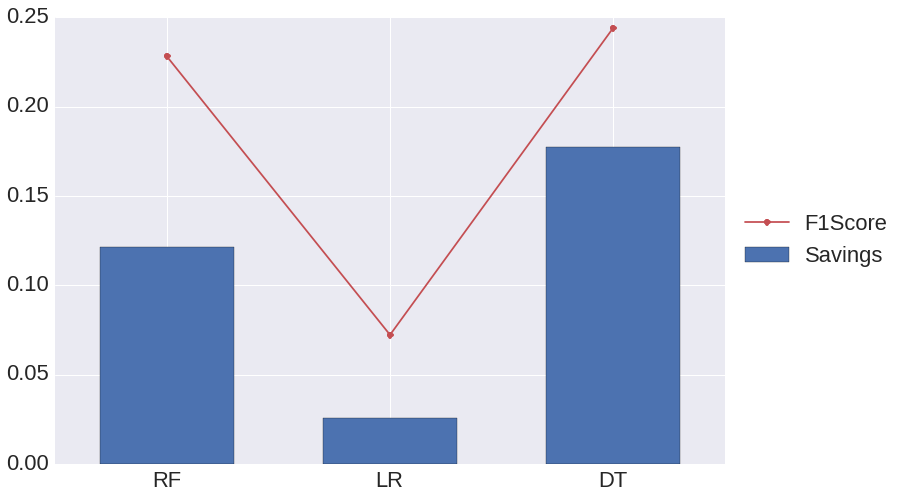

In [12]:
fig2()

- There are significant differences in the results when evaluating a model using a  traditional cost-insensitive measure such as the accuracy or F1Score

<h1 class="bigtitle">Example-Dependent Cost-Sensitive Classification</h1>

# Bayes minimum risk (BMR)

The BMR classifier is a decision model based on quantifying tradeoffs between various decisions using probabilities and the costs that accompany such decisions. 

In the specific framework of binary classification, the risk of predicting the example $i$ as negative is 

$$ R(c_i=0|\mathbf{x}_i)=C_{TN_i}(1-\hat p_i)+C_{FN_i} \cdot \hat p_i, $$
and
$$ R(c_i=1|\mathbf{x}_i)=C_{TP_i} \cdot \hat p_i + C_{FP_i}(1- \hat p_i), $$

is the risk when predicting the example as positive, where $\hat p_i$ is the estimated positive probability for example $i$. Subsequently, if 

$$  R(c_i=0|\mathbf{x}_i) \le R(c_i=1|\mathbf{x}_i), $$

then  the example $i$ is classified as negative. This means that the risk associated with the 
decision $c_i$ is lower than the risk associated with classifying it as positive. 


# BMR Code

In [13]:
from costcla.models import BayesMinimumRiskClassifier
ci_models = classifiers.keys()

for model in ci_models:
    classifiers[model+"-BMR"] = {"f": BayesMinimumRiskClassifier()}
    # Fit
    classifiers[model+"-BMR"]["f"].fit(y_test, classifiers[model]["p"])
    # Predict
    classifiers[model+"-BMR"]["c"] = classifiers[model+"-BMR"]["f"].predict(classifiers[model]["p"], cost_mat_test)
    # Evaluate
    results.loc[model+"-BMR"] = 0
    results.loc[model+"-BMR", measures.keys()] = \
    [measures[measure](y_test, classifiers[model+"-BMR"]["c"]) for measure in measures.keys()]
    results["Savings"].loc[model+"-BMR"] = savings_score(y_test, classifiers[model+"-BMR"]["c"], cost_mat_test) 

# BMR Results

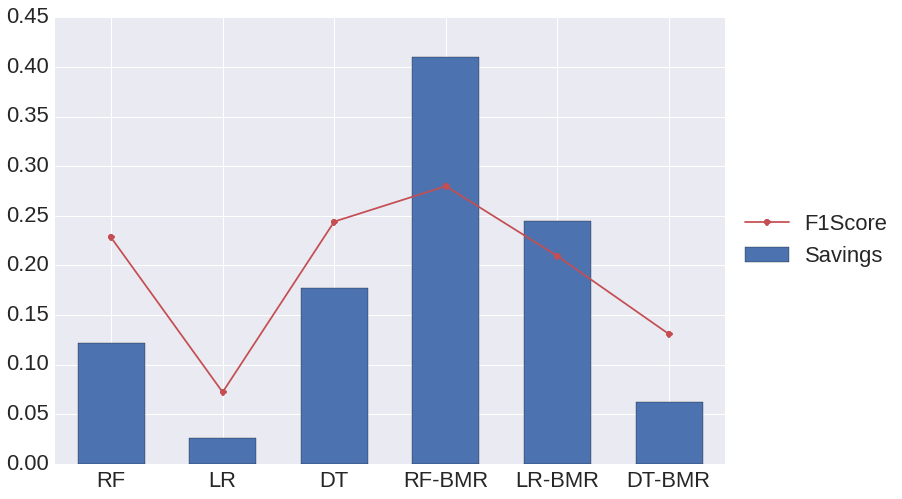

In [14]:
fig2()

# BMR Results

- Bayes Minimum Risk increases the savings by using a cost-insensitive method and then introducing the costs
- Why not introduce the costs during the estimation of the methods?

# Cost-Sensitive Decision Trees (CSDT)


- Standard impurity measures take into account the distribution of classes to evaluate the predictive power of a splitting rule
- Leading to an impurity measure that is based on minimizing the misclassification rate 
- However, minimizing misclassification does not lead to the same results than minimizing cost. 

# Cost-sensitive impurity measures

Taking into account the cost matrix of each example.

A a new cost-based impurity measure taking into account the costs when all the examples
in a leaf are classified both as negative using $f_0$ and positive using $f_1$

$$    I_c(\mathcal{S}) = \min \bigg\{ Cost(f_0(\mathcal{S})), Cost(f_1(\mathcal{S})) \bigg\}. $$

The objective of this measure is to evaluate the lowest expected cost of a splitting rule.

# CSDT Code

In [15]:
from costcla.models import CostSensitiveDecisionTreeClassifier

classifiers["CSDT"] = {"f": CostSensitiveDecisionTreeClassifier()}
# Fit
classifiers["CSDT"]["f"].fit(X_train, y_train, cost_mat_train)
# Predict
classifiers["CSDT"]["c"] = classifiers["CSDT"]["f"].predict(X_test)
# Evaluate
results.loc["CSDT"] = 0
results.loc["CSDT", measures.keys()] = \
[measures[measure](y_test, classifiers["CSDT"]["c"]) for measure in measures.keys()]
results["Savings"].loc["CSDT"] = savings_score(y_test, classifiers["CSDT"]["c"], cost_mat_test)

# CSDT Results

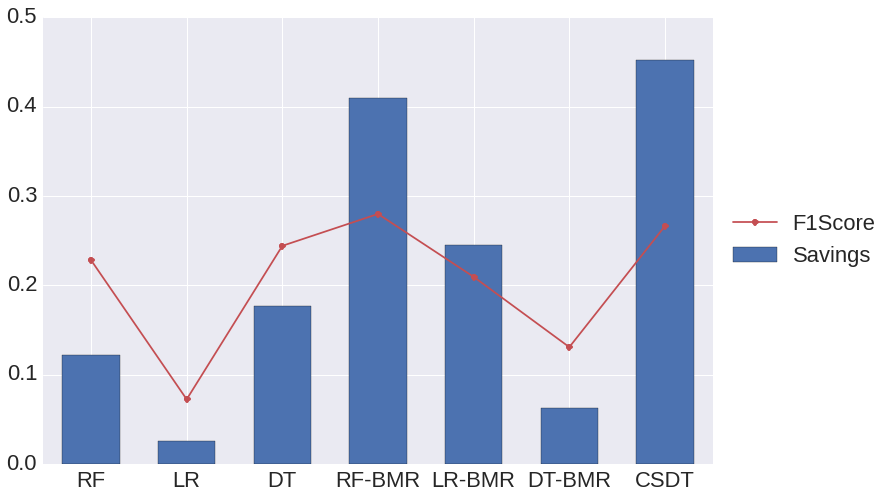

In [16]:
fig2()

<img img class="logo" src="https://raw.githubusercontent.com/albahnsen/CostSensitiveClassification/master/logo.png" style="width: 600px;">

# CostCla Library

- **CostCla** is a Python open source cost-sensitive classification library built on top of Scikit-learn, Pandas and Numpy. 

- It provides a wide range of state-of-the-art example-dependent cost-sensitive methods for binary classification tasks. 

- Moreover, the library also includes four different example-dependent cost-sensitive databases.

- Source code, binaries and documentation are distributed under 3-Clause BSD license in the website http://albahnsen.com/CostSensitiveClassification/

# CostCla Algorithms

- cost-proportionate rejection-sampling \citep{Zadrozny2003}, 
- cost-proportionate over-sampling \citep{Elkan2001}
- Bayes minimum risk \citep{CorreaBahnsen2013,CorreaBahnsen2014}
- cost-sensitive logistic regression \citep{CorreaBahnsen2014b}
- cost-sensitive decision trees \citep{CorreaBahnsen2015} 
- and the cost-sensitive ensemble methods: cost-sensitive bagging, cost-sensitive pasting, cost-sensitive random forest and cost-sensitive random patches \citep{CorreaBahnsen2015b}.

# CostCla Databases

- In particular two credit scoring databases, and one direct marketing database.

#Installation

CostCla requires some prerequisite packages to be previously installed. Nevertheless, all 
are cross-platform an freely available online:
-    Python version $\ge$ 2.7
-    Numpy version $\ge$ 1.8.0
-    Pandas version $\ge$ 0.14.0
-    Scikit-learn version $\ge$ 0.15.0b2
-    pyea version $\ge$ 0.1


The easiest way to install CostCla  is with pip:

```
pip install costcla
```

#Future Work

- Compatibility with Python $\ge$ 3.4
- CSDT in Cython
- Other algorithms
- More databases

<h1 class="bigtitle">Conclusions</h1>

CostCla is a easy to use Python library for example-dependent cost-sensitive 
classification problems. It includes many example-dependent cost-sensitive algorithms. Since 
it is part of the scientific Python ecosystem, it can be easily integrated with other 
machine learning libraries. Future work includes adding more cost-sensitive databases and 
algorithms, and support for Python $\ge$ 3.4. 

<h1 class="bigtitle">Thanks!</h1>

In [17]:
#Format from https://github.com/ellisonbg/talk-2013-scipy
from IPython.display import display, HTML
s = """

<style>

.rendered_html {
    font-family: "proxima-nova", helvetica;
    font-size: 150%;
    line-height: 1.3;
}

.rendered_html h1 {
    margin: 0.25em 0em 0.5em;
    color: #015C9C;
    text-align: center;
    line-height: 1.2; 
    page-break-before: always;
}

.rendered_html h2 {
    margin: 1.1em 0em 0.5em;
    color: #26465D;
    line-height: 1.2;
}

.rendered_html h3 {
    margin: 1.1em 0em 0.5em;
    color: #002845;
    line-height: 1.2;
}

.rendered_html li {
    line-height: 1.5; 
}

.prompt {
    font-size: 120%; 
}

.CodeMirror-lines {
    font-size: 120%; 
}

.output_area {
    font-size: 120%; 
}

#notebook {
    background-image: url('files/images/witewall_3.png');
}

h1.bigtitle {
    margin: 4cm 1cm 4cm 1cm;
    font-size: 300%;
}

h3.point {
    font-size: 200%;
    text-align: center;
    margin: 2em 0em 2em 0em;
    #26465D
}

.logo {
    margin: 20px 0 20px 0;
}

a.anchor-link {
    display: none;
}

h1.title { 
    font-size: 250%;
}

</style>
"""
display(HTML(s))